This is the part 1 of the assignment where we will do the object detection for Number Plate from a car. This program is efficient enough to extract NumberPlate belonging to any state. It has been trained on Plate belonging to various countries and through various times.

The Datasets we have used are:
*   Stanford Cars Dataset  -  https://www.kaggle.com/jessicali9530/stanford-cars-dataset
*   Turkish License Plate Detector  -  https://github.com/muratlutfigoncu/turkish-license-plate-detector/tree/master/positive_images
*   Indian License Plates  -  https://www.kaggle.com/thamizhsterio/indian-license-plates
*   Furthermore, we created our own Dataset of Punjab Number Plates using PIL. For now it is available on google drive and I will be uploading on github soon.
https://drive.google.com/open?id=1mGx7aVdC3jUMINOoCTj9TIH3m4AYsguS



We have taken help from the coursera notebooks We got familiar with during the course.


We will be extracting NumberPlates in this program and the Punjab one will be used in next program to segment Characters and Digits and classify them.



In [0]:
# To upload json file to get data from kaggle
from google.colab import files
files.upload()


Installing Kaggle to get the standford cars dataset. We will then download and extract it to be made ready to use.

In [0]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [0]:
import zipfile
!kaggle datasets download -d jessicali9530/stanford-cars-dataset
local_zip = '/content/stanford-cars-dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/stanford-cars-dataset')
zip_ref.close()

 99% 1.80G/1.82G [00:24<00:00, 69.3MB/s]
100% 1.82G/1.82G [00:24<00:00, 81.0MB/s]


Accessing my Google Drive to get access to Punjab Number Plates Dataset that I created.

In [0]:
# Access drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def getFilesInDir(dir):
    lst = [] # Empty array
    
    for file in os.listdir(dir):
        lst.append(file) # will append names of files one by one.
    return lst

Creating folder from where we will get the Data and Labels

In [0]:
!git clone https://github.com/SameedAhmedKhan/turkish-license-plate-detector.git
!git clone https://github.com/muratlutfigoncu/turkish-license-plate-detector/tree/master/positive_images


Cloning into 'turkish-license-plate-detector'...
remote: Enumerating objects: 6251, done.
remote: Total 6251 (delta 0), reused 0 (delta 0), pack-reused 6251
Receiving objects: 100% (6251/6251), 114.00 MiB | 45.30 MiB/s, done.
Resolving deltas: 100% (215/215), done.
Cloning into 'positive_images'...
fatal: repository 'https://github.com/muratlutfigoncu/turkish-license-plate-detector/tree/master/positive_images/' not found


In [0]:

!rm -rf '/tmp/platetrain'
!rm -rf '/tmp/platetest'


In [0]:
!mkdir '/tmp/platetrain/'
!mkdir '/tmp/platetest/'
!mkdir '/tmp/platetrain/plate/'
!mkdir '/tmp/platetest/plate/'
!mkdir '/tmp/platetrain/negative/'
!mkdir '/tmp/platetest/negative/'

Getting the Relevant Data

In [0]:
import shutil
import os
source = '/tmp/stanford-cars-dataset/cars_train/cars_train/'
dest1 =  '/tmp/platetrain/negative/'

files = os.listdir(source)

for f in range (467):
    shutil.copy(source+files[f], dest1)

source = '/tmp/stanford-cars-dataset/cars_test/cars_test/'
dest1 =  '/tmp/platetest/negative/'

files = os.listdir(source)

for f in range (641):
    shutil.copy(source+files[f], dest1)

In [0]:
import shutil
import os
source = '/content/gdrive/My Drive/PunjabNumberPlates/'
dest1 =  '/tmp/platetrain/plate/'

files = os.listdir(source)

for f in range (1500):
    shutil.copy(source+files[f], dest1)

source = '/content/gdrive/My Drive/PunjabNumberPlates/'
dest1 =  '/tmp/platetest/plate/'

files = os.listdir(source)

for f in range (500):
    shutil.copy(source+files[f+1500], dest1)

In [0]:
import shutil
import os

source = '/content/gdrive/My Drive/IndianPlateDataset/crop_h1/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)

source = '/content/gdrive/My Drive/IndianPlateDataset/crop_h2/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)


source = '/content/gdrive/My Drive/IndianPlateDataset/crop_h3/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)


source = '/content/gdrive/My Drive/IndianPlateDataset/crop_h4/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)



source = '/content/gdrive/My Drive/IndianPlateDataset/crop_m1/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)



source = '/content/gdrive/My Drive/IndianPlateDataset/crop_m2/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)

    

source = '/content/gdrive/My Drive/IndianPlateDataset/crop_m4/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (len(files)):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)


source = '/content/gdrive/My Drive/IndianPlateDataset/crop_m3/'
dest1 = '/tmp/platetest/plate/'

files = os.listdir(source)


for f in range (len(files)):                                             # 400 Turkish + 100 Indian
    shutil.copy(source+files[f], dest1)

    

In [0]:
import shutil
source = '/content/turkish-license-plate-detector/positive_images/'
dest1 = '/tmp/platetrain/plate/'

files = os.listdir(source)


for f in range (1950):                                            # 1950 Turkish + 550 Indian
    shutil.copy(source+files[f], dest1)

source = '/content/turkish-license-plate-detector/positive_images/'
dest1 = '/tmp/platetest/plate/'

files = os.listdir(source)


for f in range (400):                                             # 400 Turkish + 100 Indian
    shutil.copy(source+files[1950+f], dest1)

 
source = '/content/turkish-license-plate-detector/negative_images/'
dest1 = '/tmp/platetrain/negative/'

files = os.listdir(source)


for f in range (1950):
    shutil.copy(source+files[f], dest1)

source = '/content/turkish-license-plate-detector/negative_images/'
dest1 = '/tmp/platetest/negative/'

files = os.listdir(source)


for f in range (400):
    shutil.copy(source+files[1950+f], dest1)

In [0]:
import shutil
import os
source = '/content/gdrive/My Drive/PakiNumPlates-20200510T081357Z-001/PakiNumPlates/'
dest1 =  '/tmp/platetrain/negative/'

files = os.listdir(source)

for f in range (1200):
    shutil.copy(source+files[f], dest1)

source = '/content/gdrive/My Drive/PakiNumPlates-20200510T081357Z-001/Plates/'
dest1 =  '/tmp/platetrain/plate/'

files = os.listdir(source)

for f in range (25):
    shutil.copy(source+files[f], dest1)

Deleteing the irrelevant files

In [0]:
!rm -rf '/tmp/platetrain/negative/.DS_Store'
!rm -rf '/tmp/platetrain/.ipynb_checkpoints'
!rm -rf '/tmp/platetest/.ipynb_checkpoints'

Getting the insights about the data

In [0]:

main_dir = os.path.join('/tmp/platetrain/')
main_dir = os.listdir(main_dir)

train_plate = os.path.join('/tmp/platetrain/plate/')
train_plate_dir = os.listdir(train_plate)
test_plate = os.path.join('/tmp/platetest/plate/')
test_plate_dir = os.listdir(test_plate)
train_negative = os.path.join('/tmp/platetrain/negative/')
train_negative_dir = os.listdir(train_negative)
test_negative = os.path.join('/tmp/platetest/negative/')
test_negative_dir = os.listdir(test_negative)

print('main_dir')
print(len(main_dir))
print(main_dir[:10])

print('train_plate_dir')
print(len(train_plate_dir))
print(train_plate_dir[:10])
print('test_plate_dir')
print(len(test_plate_dir))
print(test_plate_dir[:10])
print('train_negative_dir')
print(len(train_negative_dir))
print(train_negative_dir[:10])
print('test_negative_dir')
print(len(test_negative_dir))
print(test_negative_dir[:10])


main_dir
2
['plate', 'negative']
train_roads_dir
3616
['eu-1338.png', 'IMG_1922.JPG', 'eu-34.png', '1006.png', 'IMG_1874.JPG', 'eu-1234.png', 'IMG_1377.JPG', 'eu-1295.png', '1247.png', '1436.png']
test_roads_dir
1041
['945.png', '957.png', 'I00117.png', '706.png', '753.png', '585.png', 'I00081.png', 'I00002.png', '605.png', '784.png']
train_cars_dir
3616
['00190.jpg', '07670.jpg', '03739.jpg', '03463.jpg', '01017.jpg', '04036.jpg', '01125.jpg', '04536.jpg', 'neg-4287.jpg', '06672.jpg']
test_cars_dir
1041
['00190.jpg', '07670.jpg', '03739.jpg', '03463.jpg', '01017.jpg', '04036.jpg', '01125.jpg', '04536.jpg', '06672.jpg', '03336.jpg']


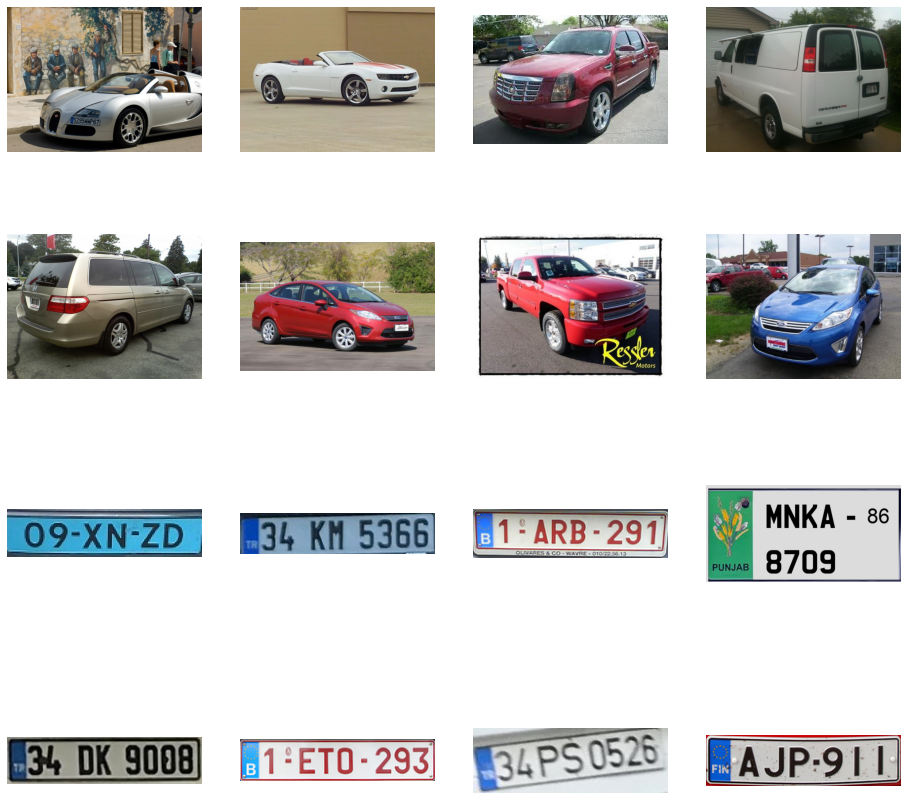

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_plate_pix = [os.path.join(train_plate, fname) 
                for fname in train_plate_dir[pic_index-8:pic_index]]
next_negative_pix = [os.path.join(train_negative, fname) 
                for fname in train_negative_dir[pic_index-8:pic_index]]

for i, img_path in enumerate(next_plate_pix+next_negative_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
#!pip install -U tensorflow
import tensorflow as tf

In [0]:
import os
import zipfile

# Our keras Model:
# I had tried with different layers with different window sizes and output but found this one to be working much better than the other ones. 
 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Since, we have data belonging to two labels we will be using binary cross entropy as loss and accuracy matrix. For optimizer we could have used Adam too that'd work fine too.
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# Instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
# This is being done in order to create more and more data. The more the data the better will be accuarcy. It will also create variations so that our model may not overfit.
train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 360 using train_datagen generator. 
# I am using the following formula:
# Total Images = Batch Size * Steps
# Setting the Tarhet Size to be 150x 150 so the image will be resized on every input. 

# And since we have either plate or negative we will use binary class mode
train_generator = train_datagen.flow_from_directory(
        '/tmp/platetrain/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=360,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        '/tmp/platetest/',
        target_size=(150, 150),
        batch_size=104,
        class_mode='binary')

model.summary()


Found 7232 images belonging to 2 classes.
Found 2081 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 128)       0         
____________________________________

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=20,  # 1000 images = batch_size * steps
      verbose=2)


Epoch 1/50
20/20 - 62s - loss: 0.3893 - acc: 0.8520 - val_loss: 0.2764 - val_acc: 0.8976
Epoch 2/50
20/20 - 61s - loss: 0.2836 - acc: 0.8980 - val_loss: 0.2702 - val_acc: 0.8957
Epoch 3/50
20/20 - 61s - loss: 0.2126 - acc: 0.9287 - val_loss: 0.1375 - val_acc: 0.9668
Epoch 4/50
20/20 - 62s - loss: 0.2015 - acc: 0.9285 - val_loss: 0.1962 - val_acc: 0.9111
Epoch 5/50
20/20 - 64s - loss: 0.1572 - acc: 0.9440 - val_loss: 0.3782 - val_acc: 0.8615
Epoch 6/50
20/20 - 61s - loss: 0.1333 - acc: 0.9530 - val_loss: 0.0639 - val_acc: 0.9793
Epoch 7/50
20/20 - 61s - loss: 0.1468 - acc: 0.9479 - val_loss: 0.0573 - val_acc: 0.9755
Epoch 8/50
20/20 - 61s - loss: 0.1072 - acc: 0.9654 - val_loss: 0.0941 - val_acc: 0.9572
Epoch 9/50
20/20 - 61s - loss: 0.1439 - acc: 0.9478 - val_loss: 0.0606 - val_acc: 0.9716
Epoch 10/50
20/20 - 61s - loss: 0.1302 - acc: 0.9539 - val_loss: 0.0479 - val_acc: 0.9798
Epoch 11/50
20/20 - 61s - loss: 0.0952 - acc: 0.9703 - val_loss: 0.0415 - val_acc: 0.9827
Epoch 12/50
20/20 -

Saving the model and wights so that we dont have to compile it again and again.

In [0]:
'''
model_json = model.to_json()
with open("/content/gdrive/My Drive/modelplate.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/gdrive/My Drive/modelplateweights.h5")
print("Saved model to disk")
'''

In [0]:

# load json and create model
json_file = open('/content/gdrive/My Drive/modelplate.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model =  tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("/content/gdrive/My Drive/modelplateweights.h5")
print("Loaded model from disk")

Loaded model from disk


Plotting the following:


*   Training and Validation Accuracy
*   Training and Validation Loss



In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Uploading some images and checking whether the model can extract the NumberPlates accurately or not.
We will then use the extracted Plates for Character Recognition in next Notebook.


Saving download (2).jfif to download (2) (8).jfif


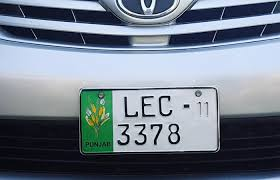

download (2).jfif is a plate


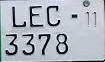

In [0]:
import cv2
import sys
from google.colab.patches import cv2_imshow

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn

  img = cv2.imread(path)
  
  cv2_imshow( img);

  cv2.setUseOptimized(True)
  cv2.setNumThreads(8)

  gs = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  gs.setBaseImage(img)

  #gs.switchToSingleStrategy()
  #gs.switchToSelectiveSearchFast()
  gs.switchToSelectiveSearchQuality()


  rects = gs.process()
  nb_rects = 50

  wimg = img.copy()
  croppedimages=[]

  for i in range(len(rects)):
              if (i < nb_rects):
                  x, y, w, h = rects[i]
  #                cv2.rectangle(wimg, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                  if w/h>1.3 and w/h <1.7:
                   croppedimages.append(wimg[y:y+h, x:x+w])
                  

 # cv2_imshow( wimg);
  c = cv2.waitKey()

  for eachCropped in croppedimages:
    c = cv2.waitKey()

    #cv2_imshow( eachCropped);
    img = cv2.resize(eachCropped, (150, 150)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    #print(classes[0])
    
    
    if classes[0]>0.5:
      print(fn + " is a plate")
      cv2_imshow( eachCropped);
      break
    #else:
    #  print(fn + " is a negative")

  cv2.destroyAllWindows()